## Uczenie maszynowe UMZ 2017/2018
# 4. Dobre praktyki w uczeniu maszynowym

## 4.1. Regresja wielomianowa

### Wybór cech

Zadanie: przewidzieć cenę działki o kształcie prostokąta.

Jakie cechy wybrać?

 * $x_1$ – szerokość działki, $x_2$ – długość działki:
$$ h_{\theta}(\vec{x}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

 * $x_1$ – powierzchnia działki:
$$ h_{\theta}(\vec{x}) = \theta_0 + \theta_1 x_1 $$

### Regresja wielomianowa

In [266]:
# Przydtne importy

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [267]:
# Przydatne funkcje

# Wersja macierzowa funkcji kosztu
def cost(theta, X, y):
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

# Wersja macierzowa gradientu funkcji kosztu
def gradient(theta, X, y):
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

# Algorytm gradientu prostego (wersja macierzowa)
def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-5):
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

# Wykres danych (wersja macierzowa)
def plot_data(X, y, xlabel, ylabel):    
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

# Wykres funkcji fun
def plot_fun(fig, fun, X):
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth='2')

In [268]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
data = np.matrix(alldata[['sqrMetres', 'price']])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]
Xn /= np.amax(Xn, axis=0)
Xn2 = np.power(Xn, 2) 
Xn2 /= np.amax(Xn2, axis=0)
Xn3 = np.power(Xn, 3) 
Xn3 /= np.amax(Xn3, axis=0)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2), axis=1)).reshape(m, 2 * n + 1)
X3 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn3), axis=1)).reshape(m, 3 * n + 1)
y = np.matrix(data[:, -1]).reshape(m, 1)

Postać ogólna regresji wielomianowej:

$$ h_{\theta}(x) = \sum_{i=1}^{n} \theta_i x^i $$

In [269]:
# Funkcja regresji wielomianowej

def h_poly(Theta, x):
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))

def polynomial_regression(theta):
    return lambda x: h_poly(theta, x)

Funkcja kwadratowa:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$

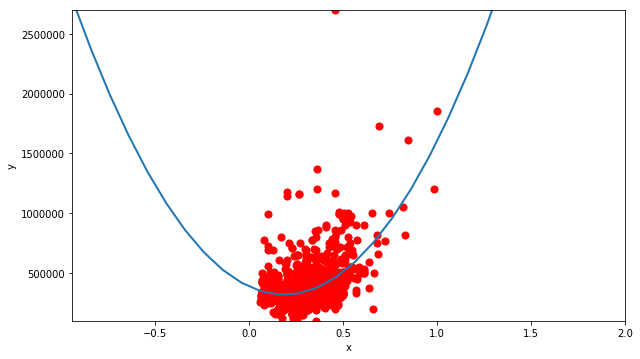

In [271]:
fig = plot_data(X2, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, X2, y)
plot_fun(fig, polynomial_regression(theta), X)

Funkcja sześcienna:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$

ValueError: x and y must be the same size

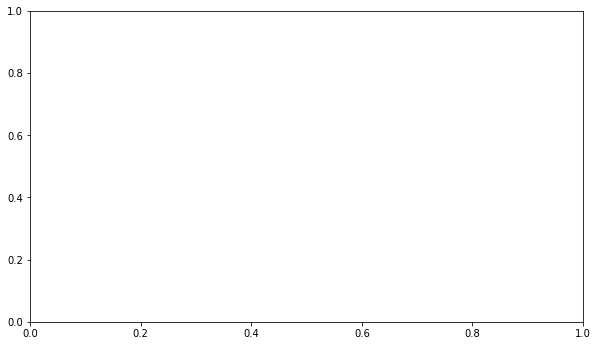

In [408]:
fig = plot_data(X3, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0, 0]).reshape(4, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X3, y)
plot_fun(fig, polynomial_regression(theta), X)

print(theta)

Regresję wielomianową można potraktować jako szczególny przypadek regresji liniowej wielu zmiennych:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$
$$ x_1 = x, \quad x_2 = x^2, \quad x_3 = x^3, \quad \vec{x} = \left[ \begin{array}{ccc} x_0 \\ x_1 \\ x_2 \end{array} \right] $$

Uwaga praktyczna: przyda się normalizacja cech, szczególnie skalowanie!

W ten sposób możemy stosować również inne „pochodne” cechy, np.:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 \sqrt{x} $$
$$ x_1 = x, \quad x_2 = \sqrt{x}, \quad \vec{x} = \left[ \begin{array}{ccc} x_0 \\ x_1 \end{array} \right] $$

### Wielomianowa regresja logistyczna

Podobne modyfikacje cech możemy również stosować dla regresji logistycznej.

In [338]:
def powerme(x1,x2,n):
    X = []
    for m in range(n+1):
        for i in range(m+1):
            X.append(np.multiply(np.power(x1,i),np.power(x2,(m-i))))
    return np.hstack(X)

In [339]:
# Wczytanie danych

alldata = pandas.read_csv('polynomial_logistic.tsv', sep='\t')
data = np.matrix(alldata)

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 1:]

Xpl = powerme(data[:, 1], data[:, 2], n)
Ypl = np.matrix(data[:, 0]).reshape(m, 1)

In [340]:
# Wykres danych (wersja macierzowa)
def plot_data_for_classification(X, Y, xlabel, ylabel):    
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    X = X.tolist()
    Y = Y.tolist()
    X1n = [x[1] for x, y in zip(X, Y) if y[0] == 0]
    X1p = [x[1] for x, y in zip(X, Y) if y[0] == 1]
    X2n = [x[2] for x, y in zip(X, Y) if y[0] == 0]
    X2p = [x[2] for x, y in zip(X, Y) if y[0] == 1]
    ax.scatter(X1n, X2n, c='r', marker='x', s=50, label='Dane')
    ax.scatter(X1p, X2p, c='g', marker='o', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    return fig

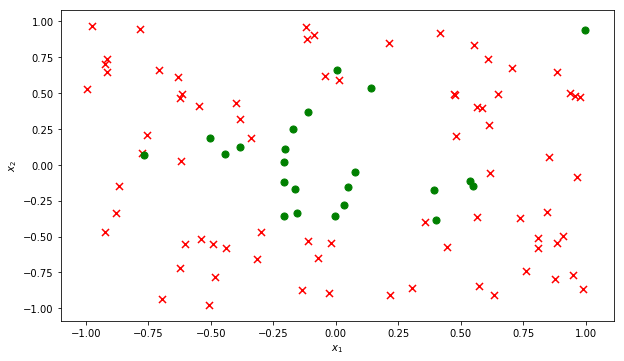

In [341]:
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r'$x_1$', ylabel=r'$x_2$')

Propozycja hipotezy:

$$ h_\theta(x) = g(\theta^T x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5) \; , $$

gdzie $g$ – funkcja logistyczna, $x_3 = x_1^2$, $x_4 = x_2^2$, $x_5 = x_1 x_2$.

In [342]:
def safeSigmoid(x, eps=0):
    y = 1.0/(1.0 + np.exp(-x))
    if eps > 0:
        y[y < eps] = eps
        y[y > 1 - eps] = 1 - eps
    return y

def h(theta, X, eps=0.0):
    return safeSigmoid(X*theta, eps)

def J(h,theta,X,y, lamb=0):
    m = len(y)
    f = h(theta, X, eps=10**-7)
    j = -np.sum(np.multiply(y, np.log(f)) + 
                np.multiply(1 - y, np.log(1 - f)), axis=0)/m
    if lamb > 0:
        j += lamb/(2*m) * np.sum(np.power(theta[1:],2))
    return j

def dJ(h,theta,X,y,lamb=0):
    g = 1.0/y.shape[0]*(X.T*(h(theta,X)-y))
    if lamb > 0:
        g[1:] += lamb/float(y.shape[0]) * theta[1:] 
    return g

def classifyBi(theta, X):
    prob = h(theta, X)
    return prob

In [343]:
# Metoda gradientu prostego dla regresji logistycznej
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

In [344]:
# Uruchomienie metody gradientu prostego dla regresji logistycznej
theta_start = np.matrix(np.zeros(Xpl.shape[1])).reshape(Xpl.shape[1],1)
theta, errors = GD(h, J, dJ, theta_start, Xpl, Ypl, 
                       alpha=0.1, eps=10**-7, maxSteps=10000)
print(r'theta = {}'.format(theta))

theta = [[ 1.59558981]
 [ 0.12602307]
 [ 0.65718518]
 [-5.26367581]
 [ 1.96832544]
 [-6.97946065]]


In [345]:
# Wykres granicy decyzyjnej
def plot_decision_boundary(fig, theta, X):
    ax = fig.axes[0]
    xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.02),
                         np.arange(-1.0, 1.0, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l, 1), yy.reshape(l, 1), n)
    z = classifyBi(theta, C).reshape(int(np.sqrt(l)), int(np.sqrt(l)))

    plt.contour(xx, yy, z, levels=[0.5], lw=3);

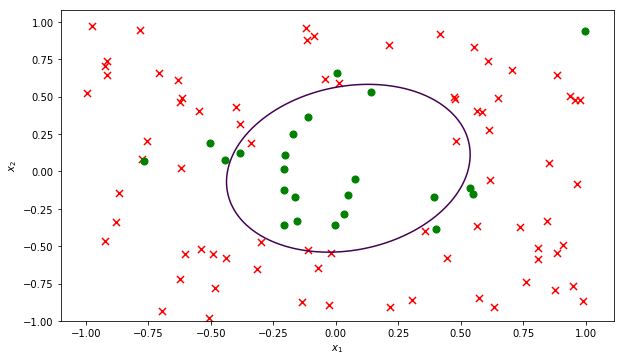

In [346]:
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r'$x_1$', ylabel=r'$x_2$')
plot_decision_boundary(fig, theta, Xpl)

In [351]:
# Wczytanie danych

alldata = pandas.read_csv('polynomial_logistic.tsv', sep='\t')
data = np.matrix(alldata)

m, n_plus_1 = data.shape
Xn = data[:, 1:]

n = 10
Xpl = powerme(data[:, 1], data[:, 2], n)
Ypl = np.matrix(data[:, 0]).reshape(m, 1)

theta_start = np.matrix(np.zeros(Xpl.shape[1])).reshape(Xpl.shape[1],1)
theta, errors = GD(h, J, dJ, theta_start, Xpl, Ypl, 
                       alpha=0.1, eps=10**-7, maxSteps=10000)

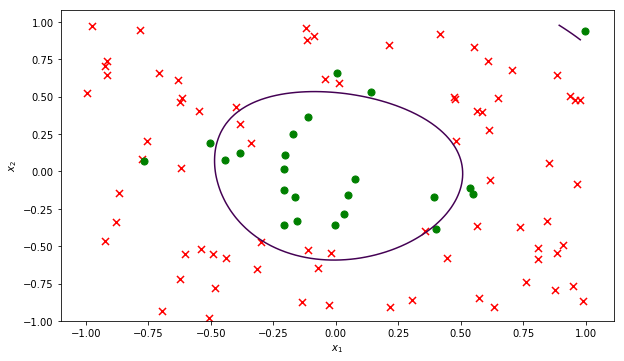

In [352]:
# Przykład dla większej liczby cech
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r'$x_1$', ylabel=r'$x_2$')
plot_decision_boundary(fig, theta, Xpl)

## 4.2. Problem nadmiernego dopasowania

### Obciążenie a wariancja

In [285]:
# Dane do prostego przykładu

data = np.matrix([
        [0.0, 0.0],
        [0.5, 1.8],
        [1.0, 4.8],
        [1.6, 7.2],
        [2.6, 8.8],
        [3.0, 9.0],
    ])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn1 = data[:, 0:n]
Xn1 /= np.amax(Xn1, axis=0)
Xn2 = np.power(Xn1, 2) 
Xn2 /= np.amax(Xn2, axis=0)
Xn3 = np.power(Xn1, 3) 
Xn3 /= np.amax(Xn3, axis=0)
Xn4 = np.power(Xn1, 4) 
Xn4 /= np.amax(Xn4, axis=0)
Xn5 = np.power(Xn1, 5) 
Xn5 /= np.amax(Xn5, axis=0)

X1 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1, Xn2), axis=1)).reshape(m, 2 * n + 1)
X5 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1, Xn2, Xn3, Xn4, Xn5), axis=1)).reshape(m, 5 * n + 1)
y = np.matrix(data[:, -1]).reshape(m, 1)

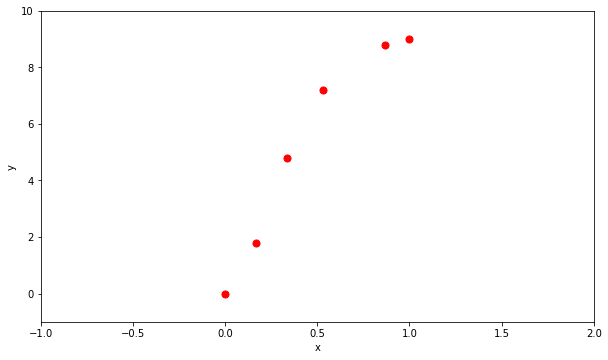

In [286]:
fig = plot_data(X1, y, xlabel='x', ylabel='y')

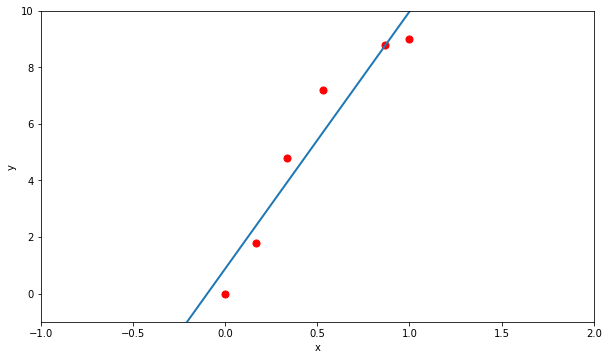

In [287]:
fig = plot_data(X1, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0]).reshape(2, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X1, y, eps=0.00001)
plot_fun(fig, polynomial_regression(theta), X1)

Ten model ma duże **obciążenie** (**błąd systematyczny**, _bias_) – zachodzi **niedostateczne dopasowanie** (_underfitting_).

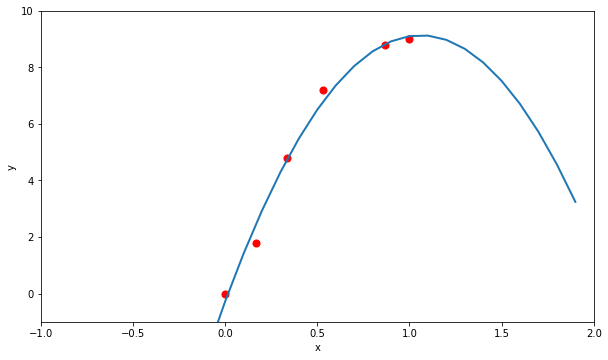

In [288]:
fig = plot_data(X2, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X2, y, eps=0.000001)
plot_fun(fig, polynomial_regression(theta), X1)

Ten model jest odpowiednio dopasowany.

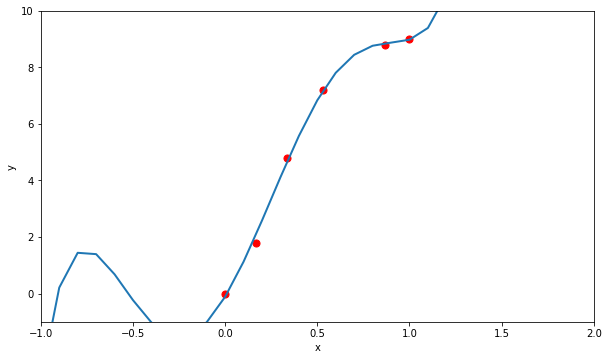

In [289]:
fig = plot_data(X5, y, xlabel='x', ylabel='y')
theta_start = np.matrix([0, 0, 0, 0, 0, 0]).reshape(6, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X5, y, alpha=0.5, eps=10**-7)
plot_fun(fig, polynomial_regression(theta), X1)

Ten model ma dużą **wariancję** (_variance_) – zachodzi **nadmierne dopasowanie** (_overfitting_).

<img style="margin:auto" width="90%" src="fit.png"/>

### Obciążenie (błąd systematyczny, _bias_)

* Wynika z błędnych założeń co do algorytmu uczącego się.
* Duże obciążenie powoduje niedostateczne dopasowanie.

### Wariancja (_variance_)

* Wynika z nadwrażliwości na niewielkie fluktuacje w zbiorze uczącym.
* Wysoka wariancja może spowodować nadmierne dopasowanie (modelując szum zamiast sygnału).

<img style="margin:auto" width="60%" src="bias2.png"/>

<img style="margin:auto" width="60%" src="curves.jpg"/>

## 4.3. Metodologia testowania

### Zbiór uczący a zbiór testowy

* Na zbiorze uczącym (treningowym) uczymy algorytmy, a na zbiorze testowym sprawdzamy ich poprawność.
* Zbiór uczący powinien być kilkukrotnie większy od testowego (np. 4:1, 9:1 itp.).
* Zbiór testowy często jest nieznany.
* Należy unikać mieszania danych testowych i treningowych – nie wolno „zanieczyszczać” danych treningowych danymi testowymi!

Czasami potrzebujemy dobrać parametry modelu, np. $\alpha$ – który zbiór wykorzystać do tego celu?

### Zbiór walidacyjny

Do doboru parametrów najlepiej użyć jeszcze innego zbioru – jest to tzw. **zbiór walidacyjny**

 * Zbiór walidacyjny powinien mieć wielkość zbliżoną do wielkości zbioru testowego, czyli np. dane można podzielić na te trzy zbiory w proporcjach 3:1:1, 8:1:1 itp.

### Walidacja krzyżowa

Którą część danych wydzielić jako zbiór walidacyjny tak, żeby było „najlepiej”?

 * Niech każda partia danych pełni tę rolę naprzemiennie!

<img width="100%" src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png"/>
Żródło: https://chrisjmccormick.wordpress.com/2013/07/31/k-fold-cross-validation-with-matlab-code/

### Walidacja krzyżowa

* Podziel dane $D = \left\{ (x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})\right\} $ na $N$ rozłącznych zbiorów $T_1,\ldots,T_N$
* Dla $i=1,\ldots,N$, wykonaj:
    * Użyj $T_i$ do walidacji i zbiór $S_i$ do trenowania, gdzie $S_i = D \smallsetminus T_i$. 
    * Zapisz model $\theta_i$.
* Akumuluj wyniki dla modeli $\theta_i$ dla zbiorów $T_i$.
* Ustalaj parametry uczenia na akumulowanych wynikach.

### Walidacja krzyżowa – wskazówki

* Zazwyczaj ustala się $N$ w przedziale od $4$ do $10$, tzw. $N$-krotna walidacja krzyżowa (_$N$-fold cross validation_). 
* Zbiór $D$ warto zrandomizować przed podziałem.
* W jaki sposób akumulować wyniki dla wszystkich zbiórow $T_i$?
* Po ustaleniu parametrów dla każdego $T_i$, trenujemy model na całych danych treningowych z ustalonymi parametrami.
* Testujemy na zbiorze testowym (jeśli nim dysponujemy).

### _Leave-one-out_

Jest to szczególny przypadek walidacji krzyżowej, w której $N = m$.

* Jaki jest rozmiar pojedynczego zbioru $T_i$?
* Jakie są zalety i wady tej metody?
* Kiedy może być przydatna?

### Zbiór walidujący a algorytmy optymalizacji

* Gdy błąd rośnie na zbiorze uczącym, mamy źle dobrany parametr $\alpha$. Należy go wtedy zmniejszyć.
* Gdy błąd zmniejsza się na zbiorze trenującym, ale roźnie na zbiorze walidującym, mamy do czynienia ze zjawiskiem **nadmiernego dopasowania** (_overfitting_).
* Należy wtedy przerwać optymalizację. Automatyzacja tego procesu to _early stopping_.

## 4.4. Regularyzacja

In [410]:
def runMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

def SGD(h, fJ, fdJ, theta, X, Y, 
        alpha=0.001, maxEpochs=1.0, batchSize=100, 
        adaGrad=False, logError=False, validate=0.0, valStep=100, lamb=0, trainsetsize=1.0):
    errorsX, errorsY = [], []
    errorsVX, errorsVY = [], []
    
    XT, YT = X, Y
    
    m_end=int(trainsetsize*len(X))
    
    if validate > 0:
        mv = int(X.shape[0] * validate)
        XV, YV = X[:mv], Y[:mv] 
        XT, YT = X[mv:m_end], Y[mv:m_end] 
    m, n = XT.shape

    start, end = 0, batchSize
    maxSteps = (m * float(maxEpochs)) / batchSize
    
    if adaGrad:
        hgrad = np.matrix(np.zeros(n)).reshape(n,1)
    
    for i in range(int(maxSteps)):
        XBatch, YBatch =  XT[start:end,:], YT[start:end,:]

        grad = fdJ(h, theta, XBatch, YBatch, lamb=lamb)
        if adaGrad:
            hgrad += np.multiply(grad, grad)
            Gt = 1.0 / (10**-7 + np.sqrt(hgrad))
            theta = theta - np.multiply(alpha * Gt, grad)
        else:
            theta = theta - alpha * grad
        
        if logError:
            errorsX.append(float(i*batchSize)/m)
            errorsY.append(fJ(h, theta, XBatch, YBatch).item())
            if validate > 0 and i % valStep == 0:
                errorsVX.append(float(i*batchSize)/m)
                errorsVY.append(fJ(h, theta, XV, YV).item())
        
        if start + batchSize < m:
            start += batchSize
        else:
            start = 0
        end = min(start + batchSize, m)
    return theta, (errorsX, errorsY, errorsVX, errorsVY)

In [411]:
# Przygotowanie danych do przykładu regularyzacji

n = 6

data = np.matrix(np.loadtxt("ex2data2.txt", delimiter=","))
np.random.shuffle(data)

X = powerme(data[:,0], data[:,1], n)
Y = data[:,2]

In [412]:
def draw_regularization_example(X, Y, lamb=0, alpha=1, adaGrad=True, maxEpochs=2500, validate=0.25):
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.scatter(X[:, 2].tolist(), X[:, 1].tolist(),
                c=Y.tolist(),
                s=100, cmap=plt.cm.get_cmap('prism'));

    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1],1)
    thetaBest, err = SGD(h, J, dJ, theta, X, Y, alpha=alpha, adaGrad=adaGrad, maxEpochs=maxEpochs, batchSize=100, 
                         logError=True, validate=validate, valStep=1, lamb=lamb)

    xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.02),
                         np.arange(-1.5, 1.5, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l, 1),yy.reshape(l, 1), n)
    z = classifyBi(thetaBest, C).reshape(int(np.sqrt(l)), int(np.sqrt(l)))

    plt.contour(xx, yy, z, levels=[0.5], lw=3);
    plt.ylim(-1,1.2);
    plt.xlim(-1,1.2);
    plt.legend();
    plt.subplot(122)
    plt.plot(err[0],err[1], lw=3, label="Training error")
    if validate > 0:
        plt.plot(err[2],err[3], lw=3, label="Validation error");
    plt.legend()
    plt.ylim(0.2,0.8);

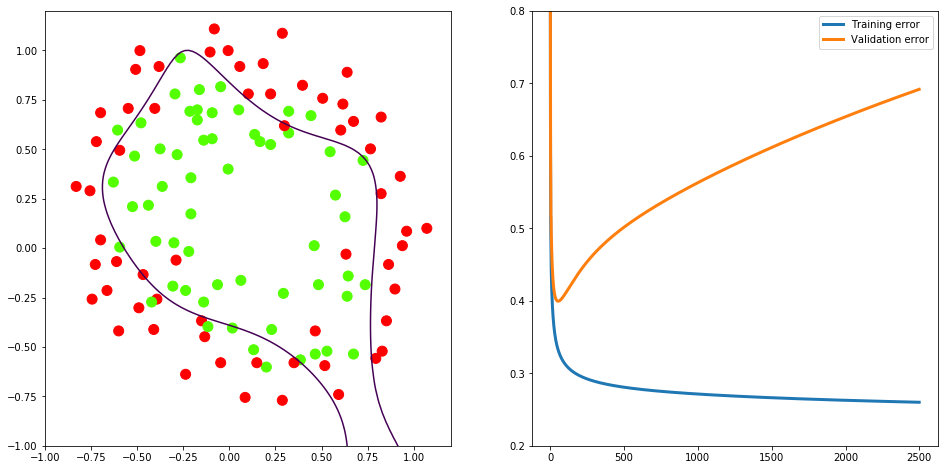

In [413]:
draw_regularization_example(X, Y)

### Regularyzacja

* Metoda zapobiegania zjawisku nadmiernego dopasowania (*overfitting*)
* „Kara” za ekstremalne wartości parametrów $\theta$

### Regularyzacja dla regresji liniowej – funkcja kosztu

$$
J(\theta) \, = \, \dfrac{1}{2m} \left( \displaystyle\sum_{i=1}^{m} h_\theta(x^{(i)}) - y^{(i)} \color{red}{ + \lambda \displaystyle\sum_{j=1}^{n} \theta^2_j } \right)
$$

* $\lambda$ – parametr regularyzacji
* jeżeli $\lambda$ jest zbyt mały, skutkuje to nadmiernym dopasowaniem
* jeżeli $\lambda$ jest zbyt duży, skutkuje to niedostatecznym dopasowaniem

### Regularyzacja dla regresji liniowej – gradient

$$\small
\begin{array}{llll}
\dfrac{\partial J(\theta)}{\partial \theta_0} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_0 & \textrm{dla $j = 0$ }\\
\dfrac{\partial J(\theta)}{\partial \theta_j} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_j \color{red}{+ \dfrac{\lambda}{m}\theta_j} & \textrm{dla $j = 1, 2, \ldots, n $} \\
\end{array} 
$$

### Regularyzacja dla regresji logistycznej – funkcja kosztu

$$
\begin{array}{rtl}
J(\theta) & = & -\dfrac{1}{m} \left( \displaystyle\sum_{i=1}^{m} y^{(i)} \log h_\theta(x^{(i)}) + \left( 1-y^{(i)} \right) \log \left( 1-h_\theta(x^{(i)}) \right) \right) \\
& & \color{red}{ + \dfrac{\lambda}{2m} \displaystyle\sum_{j=1}^{n} \theta^2_j } \\
\end{array}
$$

### Regularyzacja dla regresji logistycznej – gradient

$$\small
\begin{array}{llll}
\dfrac{\partial J(\theta)}{\partial \theta_0} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_0 & \textrm{dla $j = 0$ }\\
\dfrac{\partial J(\theta)}{\partial \theta_j} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_j \color{red}{+ \dfrac{\lambda}{m}\theta_j} & \textrm{dla $j = 1, 2, \ldots, n $} \\
\end{array} 
$$

### Implementacja metody regularyzacji

In [414]:
def J_(h,theta,X,y,lamb=0):
    m = float(len(y))
    f = h(theta, X, eps=10**-7)
    j = 1.0/m \
        * -np.sum(np.multiply(y, np.log(f)) + 
                  np.multiply(1 - y, np.log(1 - f)), axis=0) \
        + lamb/(2*m) * np.sum(np.power(theta[1:] ,2))
    return j

def dJ_(h,theta,X,y,lamb=0):
    m = float(y.shape[0])
    g = 1.0/y.shape[0]*(X.T*(h(theta,X)-y))
    g[1:] += lamb/m * theta[1:]
    return g

In [415]:
slider_lambda = widgets.FloatSlider(min=0.0, max=0.5, step=0.005, value=0.01, description=r'$\lambda$', width=300)

def slide_regularization_example_2(lamb):
    draw_regularization_example(X, Y, lamb=lamb)

In [416]:
widgets.interact_manual(slide_regularization_example_2, lamb=slider_lambda)

interactive(children=(FloatSlider(value=0.01, description=u'$\\lambda$', max=0.5, step=0.005), Button(description=u'Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.slide_regularization_example_2>

In [417]:
def cost_lambda_fun(lamb):
    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1],1)
    thetaBest, err = SGD(h, J, dJ, theta, X, Y, alpha=1, adaGrad=True, maxEpochs=2500, batchSize=100, 
                         logError=True, validate=0.25, valStep=1, lamb=lamb)
    return err[1][-1], err[3][-1]

def plot_cost_lambda():
    plt.figure(figsize=(16,8))
    ax = plt.subplot(111)
    Lambda = np.arange(0.0, 1.0, 0.01)
    Costs = [cost_lambda_fun(lamb) for lamb in Lambda]
    CostTrain = [cost[0] for cost in Costs]
    CostCV = [cost[1] for cost in Costs]
    plt.plot(Lambda, CostTrain, lw=3, label='training error')
    plt.plot(Lambda, CostCV, lw=3, label='validation error')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(u'cost')
    plt.legend()
    plt.ylim(0.2,0.8)

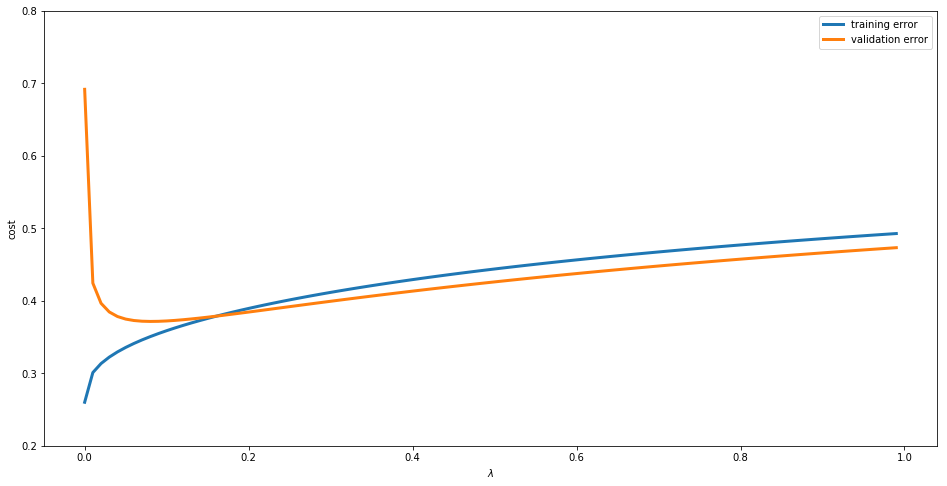

In [418]:
plot_cost_lambda()

## 4.6. Krzywa uczenia się

* Krzywa uczenia pozwala sprawdzić, czy uczenie przebiega poprawnie.
* Krzywa uczenia to wykres zależności między wielkością zbioru treningowego a wartością funkcji kosztu.
* Wraz ze wzrostem wielkości zbioru treningowego wartość funkcji kosztu na zbiorze treningowym rośnie.
* Wraz ze wzrostem wielkości zbioru treningowego wartość funkcji kosztu na zbiorze walidacyjnym maleje.

In [362]:
def cost_trainsetsize_fun(m):
    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1],1)
    thetaBest, err = SGD(h, J, dJ, theta, X, Y, alpha=1, adaGrad=True, maxEpochs=2500, batchSize=100, 
                         logError=True, validate=0.25, valStep=1, lamb=0.01, trainsetsize=m)
    return err[1][-1], err[3][-1]

def plot_learning_curve():
    plt.figure(figsize=(16,8))
    ax = plt.subplot(111)
    M = np.arange(0.3, 1.0, 0.05)
    Costs = [cost_trainsetsize_fun(m) for m in M]
    CostTrain = [cost[0] for cost in Costs]
    CostCV = [cost[1] for cost in Costs]
    plt.plot(M, CostTrain, lw=3, label='training error')
    plt.plot(M, CostCV, lw=3, label='validation error')
    ax.set_xlabel(u'trainset size')
    ax.set_ylabel(u'cost')
    plt.legend()

### Krzywa uczenia a obciążenie i wariancja

<img width="100%" src="learning-curves.png"/>

Źródło: http://www.ritchieng.com/machinelearning-learning-curve

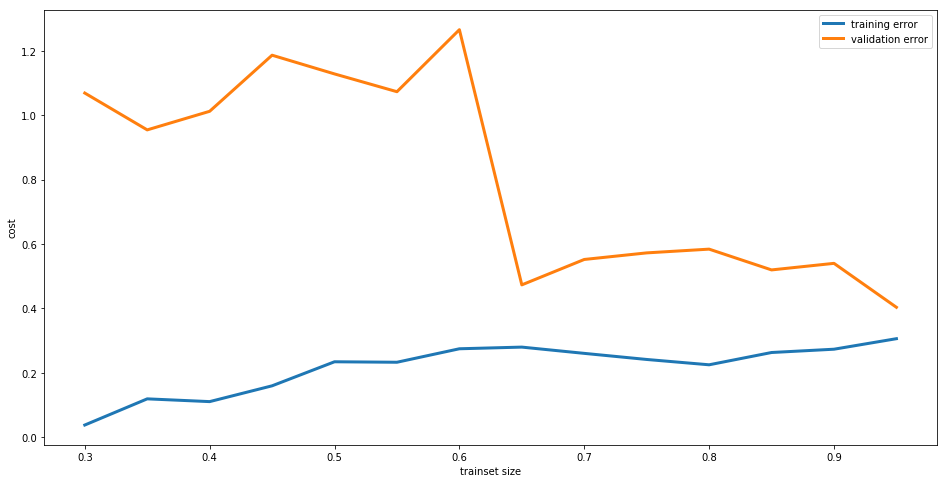

In [363]:
plot_learning_curve()

## 4.5. Obserwacje odstające

In [392]:
# Funkcja regresji liniowej

def h_linear(Theta, x):
    return x * Theta

def linear_regression(theta):
    return lambda x: h_linear(theta, x)

# Wykres krzywej regresji (wersja macierzowa)
def plot_regression(fig, fun, theta, X):
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2, 2)
    ax.plot(L, fun(theta, LX), linewidth='2',
            label=(r'$y={theta0:.2}{op}{theta1:.2}x$'.format(
                theta0=float(theta[0][0]),
                theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),
                op='+' if theta[1][0] >= 0 else '-')))

In [403]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats_with_outliers.tsv', sep='\t',
                         names=['price', 'isNew', 'rooms', 'floor', 'location', 'sqrMetres'])
data = np.matrix(alldata[['price', 'sqrMetres']])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]

Xo = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
yo = np.matrix(data[:, -1]).reshape(m, 1)

Xo /= np.amax(Xo, axis=0)
yo /= np.amax(yo, axis=0)

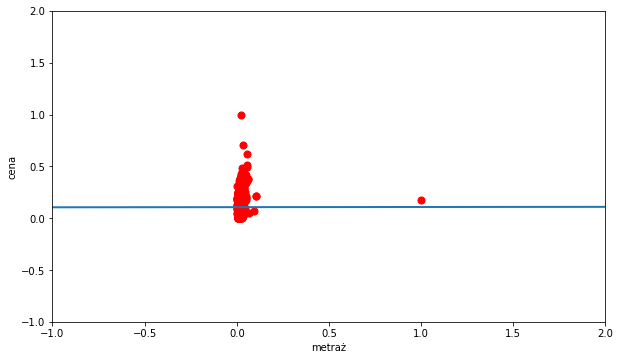

In [404]:
fig = plot_data(Xo, yo, xlabel=u'metraż', ylabel=u'cena')
theta_start = np.matrix([0.0, 0.0]).reshape(2, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, Xo, yo, alpha=0.01)
plot_regression(fig, h_linear, theta, X1)

In [405]:
# Odrzućmy obserwacje odstające
alldata_no_outliers = [
    (index, item) for index, item in alldata.iterrows() 
    if item.price > 100 and item.sqrMetres > 10]

alldata_no_outliers = alldata.loc[(alldata['price'] > 100) & (alldata['sqrMetres'] > 100)]

In [406]:
data = np.matrix(alldata_no_outliers[['price', 'sqrMetres']])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]

Xo = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
yo = np.matrix(data[:, -1]).reshape(m, 1)

Xo /= np.amax(Xo, axis=0)
yo /= np.amax(yo, axis=0)

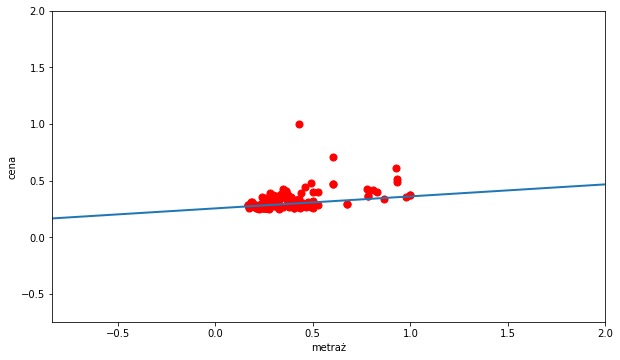

In [407]:
fig = plot_data(Xo, yo, xlabel=u'metraż', ylabel=u'cena')
theta_start = np.matrix([0.0, 0.0]).reshape(2, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, Xo, yo, alpha=0.01)
plot_regression(fig, h_linear, theta, X1)